In [32]:
import pandas as pd
arrivals_df = pd.read_csv('arrivals_2018-19_cleaned.csv')

Series:  1D data structure comprised of key-value pairs. Think of it as a single list.

### Series Constructor and Parameters:
`pandas.Series(data, index, dtype, copy)`  
       index : index to use for Series. Doesn't have to be unique (ex: ["a", "b", "a"])
       dtype : data type (int, string, etc.)  
       copy  : bool. if true, new series returned. Default: copy=true


In [33]:
# example:
data = [10,12,14,16]    # list object
s = pd.Series(data)
print ("Series:\n", s)

Series:
 0    10
1    12
2    14
3    16
dtype: int64


In [34]:
s = pd.Series(data, index=[95,96,'a',98])
print ("Series with custom indexing:")
print (s)

Series with custom indexing:
95    10
96    12
a     14
98    16
dtype: int64


In [35]:
qbRatings = {'Brady' : 100, 'Manning' : 95, 'Zach Wilson' : 24} # dictionary
s = pd.Series(qbRatings)
print ("Series made from dictionary")
print (s)

Series made from dictionary
Brady          100
Manning         95
Zach Wilson     24
dtype: int64


### Dataframes

2D data structure. Collection of two or more series with common indices. Think of it as a list of lists  
`pandas.DataFrame(data, index, columns, dtype, copy)`  

In [36]:
#nested list with 3 sublists. Each sublist has info on name, age, and danger rating
contacts = [['Joe Goldberg', 34, 95], ['Guinevere Beck', 30, 12], ['Walter White', 52, 90]]
df1 = pd.DataFrame(contacts, columns=['Name', 'Age', 'Danger Rating'])
print(df1)

             Name  Age  Danger Rating
0    Joe Goldberg   34             95
1  Guinevere Beck   30             12
2    Walter White   52             90


# Reading in data

`df = pd.read_csv('tomBradyStats.csv')`  
`df = pd.read_excel('expenseList2022.xlsx')`  
`df = pd.read_json("https://data.smcgov.org/resource/mb6a-xn89.json"`


In [37]:
# Ignore Index Parameter for Concatenation (COME BACK TO THIS)
# setting it to false means Pandas keeps original index values from two different input dataframes
# If set to true, the concatenation will ignore existing indices

# example
contacts2 = [['Boss Baby', 0.5, 45], ['Thor', 829, 99]]
df2 = pd.DataFrame(contacts, columns=['Name', 'Age', 'Danger Rating'])
df = pd.concat ([df1, df2], ignore_index=False)
print(df)

             Name  Age  Danger Rating
0    Joe Goldberg   34             95
1  Guinevere Beck   30             12
2    Walter White   52             90
0    Joe Goldberg   34             95
1  Guinevere Beck   30             12
2    Walter White   52             90


### Explore the Data:

| Command               | Meaning|
| --------              |--------|
|`df.head(n=10)`        | print first n rows, default is 5|
|`df.tail(n=10)`        | print last n rows, default is 5|
|`df.columns.tolist()`  |print list of column headers  <br />_Add .tolist() to convert object output to list_|
|`df.info()`     |print non-null count and data type of each column|
|`df.describe()` |print descriptive statistics (mean, median, percentiles, etc|
|`print(df.dtypes)`     |print datatype of each column|
|`df.shape`             | output number of rows, columns|


### Clean Dataset
1. If large dataset with few empty cells, can remove rows with empty cells.  
    - `New_df = df.dropna()` → drop nan values, put them in new_df   
    - `df.dropna(inplace = True)` → dop nan values in same dataframe
2. Replace empty values with new value  
    - `df.fillna(130, inplace=True)` → all empty cells in DF
    - `df[“Calories].fillna(130, inplace=True)`  
3. Replace empty values with mean/median/mode  
    - `df['salary'].fillna(df['salary'].mean(), inplace=True)`  

1. Replace outliers by either replacing value, or omitting row
    - `for x in df.index:`  
	        > `if df.loc[x,”Duration”] > 120:`  
            >>   `df.loc[x,"Duration"] = 120`  
2. Delete duplicate rows
    - `print(df.duplicated())` `drop_duplicates(inplace = True)`
3. Convert data in specific cells to correct format.
    - `to_datetime`: function which converts to datetime format.  
        - ex: `df['date'] = pd.to_datetime(df['date'])`
        - ex: `df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')` :  
        Specifies format of current dates (dd-mm-yyyy)
4. Rename columns 
    - `df.rename(columns={'old_name': 'new_name'}, inplace=True)`
5. Replace incorrect data
    - `df['col_name'].replace('incorrect_value', 'correct_value', inplace=True)`
    - `df.at[row_number, col_name] = 'new_val'`
6. Check for outliers
    - `df.boxplot(column=['arr_cancelled'])`







<AxesSubplot:>

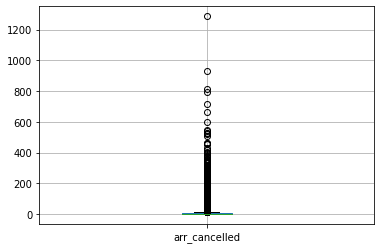

In [38]:
arrivals_df.boxplot(column=['arr_cancelled'])

# Notice the outliers!

### Indexing and Selecting Data

Goal: select subsets of data from a dataframe or series based on label or integer location  
`.loc()` : label based (select rows/columns using their labels)  
`.iloc()`: integer based (select using integer index)  

`.groupby()`: split data into groups by a specific variable. Can use with an aggregation function (sum, count, mean, max, etc)


In [39]:
#Return value present in the 'arr_cancelled' column for row #789
arrivals_df.loc[789,'arr_cancelled']

21.0

In [40]:
gc = arrivals_df.groupby('carrier_name')

gc.mean()
# gc.max()

#print first entries in all the groups formed
#gc.first()

,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
carrier_name,,,,,,,,,,,,,,,
Alaska Airlines Inc.,298.668622,51.916129,11.717472,0.860804,24.815648,0.231396,14.290985,3.095601,0.760704,2610.221114,715.414076,70.965396,978.369501,8.364809,837.107331
Allegiant Air,71.151997,15.102510,4.242301,0.914532,3.606271,0.071060,6.268597,0.491693,0.176034,1084.501591,397.658537,73.898197,157.901379,2.586073,452.457405
American Airlines Inc.,766.911111,154.687654,47.315613,5.631070,49.686156,0.302728,51.751955,14.442798,1.946091,10054.778189,3332.909053,528.841152,2284.622222,17.178601,3891.227160
Delta Air Lines Inc.,556.716088,78.351018,24.124365,3.507772,28.639627,0.067167,22.012102,1.540006,1.157729,5242.321193,1837.745053,398.779180,1447.866934,4.234299,1553.695727
Endeavor Air Inc.,202.883421,35.587737,8.383263,1.269270,12.088072,0.012880,13.834316,4.277935,0.438483,2796.666801,723.562727,188.414280,756.043566,0.689794,1127.956434
Envoy Air,190.284754,37.555454,7.832557,2.146743,13.186929,0.045811,14.343471,6.743966,0.540177,2353.699053,546.208677,203.047357,640.851207,1.758937,961.832875
ExpressJet Airlines Inc.,144.423077,30.118990,7.538780,0.650126,11.941881,0.000000,9.988341,4.560697,0.450721,2441.260817,819.125000,95.242188,764.416466,0.000000,762.477163
ExpressJet Airlines LLC,114.638725,28.756789,6.816080,0.667946,12.083152,0.000000,9.189870,4.914994,0.357733,2561.201889,789.589138,98.795750,927.945691,0.000000,744.871311
Frontier Airlines Inc.,121.207160,32.295943,9.098487,0.375723,10.106988,0.000000,12.714916,2.185203,0.184248,2288.420048,618.713126,28.495943,496.143675,0.000000,1145.067303


In [41]:
# Find all entries contained in the 'JetBlue Airways' group
gc.get_group('JetBlue Airways')

,date,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
1119,2018-1,B6,JetBlue Airways,ABQ,"Albuquerque, NM: Albuquerque International Sun...",19.0,1.0,0.38,0.00,0.00,0.00,0.62,1.0,0.0,52.0,20.0,0.0,0.0,0.0,32.0
1120,2018-1,B6,JetBlue Airways,ALB,"Albany, NY: Albany International",62.0,13.0,7.34,0.00,1.44,0.00,4.22,1.0,0.0,841.0,572.0,0.0,57.0,0.0,212.0
1121,2018-1,B6,JetBlue Airways,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",147.0,41.0,16.73,0.79,12.53,0.07,10.88,8.0,1.0,2381.0,1283.0,85.0,437.0,2.0,574.0
1122,2018-1,B6,JetBlue Airways,AUS,"Austin, TX: Austin - Bergstrom International",186.0,55.0,23.77,1.89,13.70,0.32,15.32,7.0,0.0,4674.0,2204.0,275.0,560.0,41.0,1594.0
1123,2018-1,B6,JetBlue Airways,BDL,"Hartford, CT: Bradley International",313.0,92.0,47.47,2.07,11.75,0.00,30.71,17.0,1.0,6906.0,3608.0,311.0,463.0,0.0,2524.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40503,2019-1,B6,JetBlue Airways,STT,"Charlotte Amalie, VI: Cyril E King",62.0,17.0,5.75,0.00,0.57,0.00,10.69,1.0,0.0,1780.0,830.0,0.0,47.0,0.0,903.0
40504,2019-1,B6,JetBlue Airways,STX,"Christiansted, VI: Henry E. Rohlsen",7.0,3.0,1.83,0.00,0.14,0.16,0.87,0.0,0.0,156.0,84.0,0.0,8.0,5.0,59.0
40505,2019-1,B6,JetBlue Airways,SWF,"Newburgh/Poughkeepsie, NY: New York Stewart In...",62.0,24.0,12.88,1.00,1.61,0.39,8.11,2.0,0.0,2647.0,1502.0,25.0,107.0,63.0,950.0
40506,2019-1,B6,JetBlue Airways,SYR,"Syracuse, NY: Syracuse Hancock International",147.0,50.0,24.91,1.19,6.08,0.18,17.64,9.0,2.0,4140.0,2095.0,174.0,176.0,15.0,1680.0


In [42]:
# Use groupby() to form groups based on more than one category

gca = arrivals_df.groupby(['airport', 'carrier']).sum()
print(gca)

                 arr_flights  arr_del15  carrier_ct  weather_ct  nas_ct  \
airport carrier                                                           
ABE     9E             985.0      139.0       73.41        4.55   23.41   
        DL             689.0       72.0       29.36        9.33   14.34   
        EV             621.0      164.0       64.71        4.07   42.76   
        G4            2062.0      327.0      125.21       31.79   74.39   
        MQ             524.0      120.0       25.60       11.09   32.63   
...                      ...        ...         ...         ...     ...   
XWA     OO             209.0       33.0        9.07        3.35    9.14   
YAK     AS            1444.0      199.0       22.85        5.04   54.01   
YNG     G4               2.0        2.0        1.39        0.00    0.61   
YUM     OO            2941.0      359.0      135.04        3.64   54.88   
        YV             355.0       79.0       30.82        0.84   17.95   

                 securit